# **Validation Curve**

To validate a model we need a scoring function (see Metrics and scoring: quantifying the quality of predictions), for example accuracy for classifiers. 

The proper way of choosing multiple hyperparameters of an estimator are of course grid search or similar methods (see Tuning the hyper-parameters of an estimator) that select the hyperparameter with the maximum score on a validation set or multiple validation sets. 

**Note that if we optimized the hyperparameters based on a validation score the validation score is biased and not a good estimate of the generalization any longer. To get a proper estimate of the generalization we have to compute the score on another test set.**

**However, it is sometimes helpful to plot the influence of a single hyperparameter on the training score and the validation score to find out whether the estimator is overfitting or underfitting for some hyperparameter values.**

The function validation_curve can help in this case:


**If the training score and the validation score are both low, the estimator will be underfitting.** 

**If the training score is high and the validation score is low, the estimator is overfitting and otherwise it is working very well.** 

**A low training score and a high validation score is usually not possible.** 

All three cases can be found in the plot below where we vary the parameter  of an SVM on the digits dataset.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

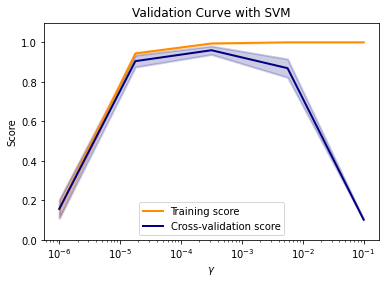

In [4]:
X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In this plot you can see the training scores and validation scores of an SVM for different values of the kernel parameter gamma. 

For very low values of gamma, you can see that both the training score and the validation score are low. This is called underfitting. 

Medium values of gamma will result in high values for both scores, i.e. the classifier is performing fairly well. 

If gamma is too high, the classifier will overfit, which means that the training score is good but the validation score is poor.